In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import joblib\

np.random.seed(42) 


In [5]:
#generate data dumy 
n_samples = 500
X1 = np.random.uniform(1, 10, n_samples) #random hours studied
noise = np.random.normal(0, 5, n_samples) #random noise
y = 10* X1 + noise #linear relationship with noise


#crete dataframe
data = pd.DataFrame({'Hours_studied': X1, 'test_score' : y})
data.head()

,Hours_studied,test_score
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


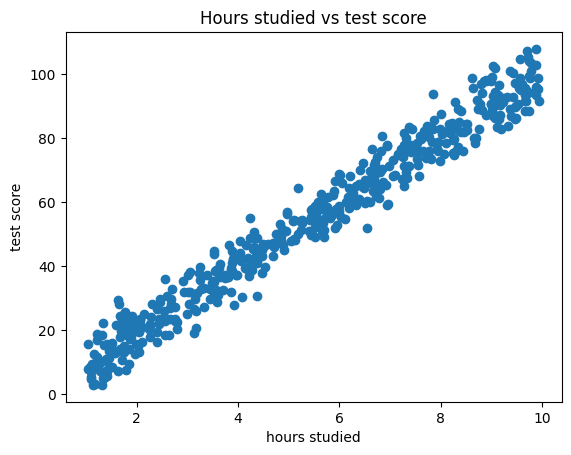

               Hours_studied  test_score
Hours_studied       1.000000    0.983399
test_score          0.983399    1.000000


In [8]:
#scatter plot
plt.scatter(data['Hours_studied'], data['test_score'])
plt.title('Hours studied vs test score')
plt.xlabel('hours studied')
plt.ylabel('test score')
plt.show()

#check corelation 
corr_matrix = data.corr()
print(corr_matrix)

In [ ]:
X = data[['Hours_studied']]
y = data['test_score']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#model
model = LinearRegression()

#train
model.fit(X_train_scaled, y_train)

#chek the model coeficient and intercept
print('coeficient', model.coef_)
print('intercept', model.intercept_)

coeficient [27.31629308]
intercept 55.31588683514129


In [13]:
#example of predicting a single value a new data point
new_data = np.array([[6]])
new_data_df = pd.DataFrame(new_data, columns=['Hours_studied'])

#scale the new data
new_data_scaled = scaler.transform(new_data_df)

#predict the test score
single_prediction = model.predict(new_data_scaled)

print(f'predicted of test score for 6 hours of study: {single_prediction[0]}')

predicted of test score for 6 hours of study: 60.03282292232381


In [15]:
# predict the test score
y_pred = model.predict(X_test_scaled)

#calculate mape an r square
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'r2_score : {r2}')
print(f'mape : {mape}')

r2_score : 0.9645671742510007
mape : 0.11221741330468607


In [ ]:
#save model dan scaler
joblib.dump(model, 'lr_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']